In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load dataset
df = pd.read_csv(r'C:\Users\tause\Downloads\Titanic-Dataset.csv')

In [5]:
# Drop unnecessary columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [8]:
# Handle missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


C:\Users\tause\AppData\Local\Temp\ipykernel_21384\1895260007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [9]:
# Encode categorical features
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])

In [10]:
# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [14]:
# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


In [15]:
# Evaluate models
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-"*50)

In [16]:
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)


Logistic Regression Model Performance:
Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[90 15]
 [20 54]]
--------------------------------------------------
Random Forest Model Performance:
Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[92 13]
 [19 55]]
-----------------------------------------

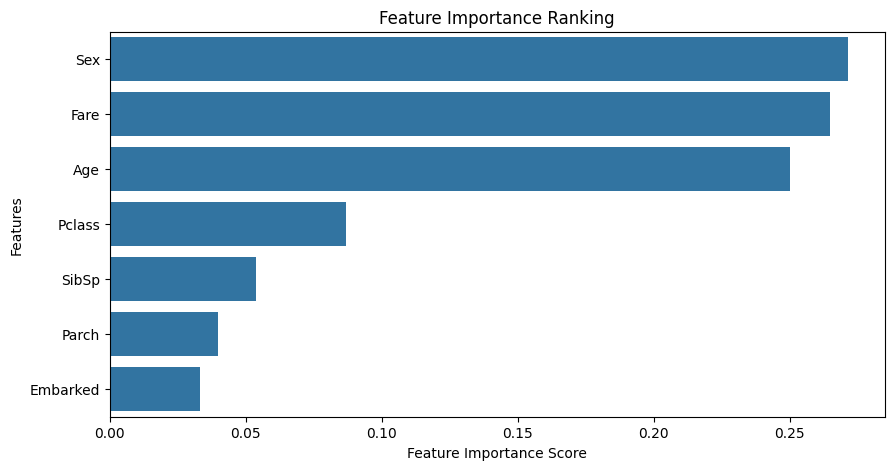

In [17]:
# Feature Importance Analysis
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Ranking")
plt.show()


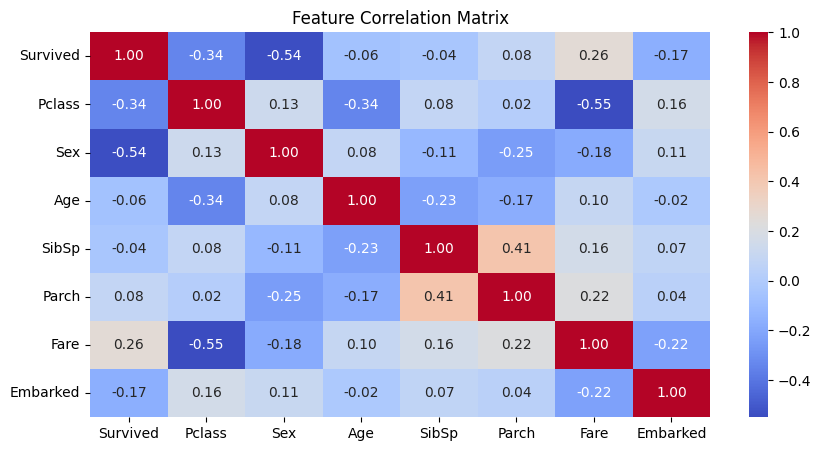

In [18]:
# Visualization
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [19]:
# Confusion Matrix Visualization
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{title} - Confusion Matrix")
    plt.show()


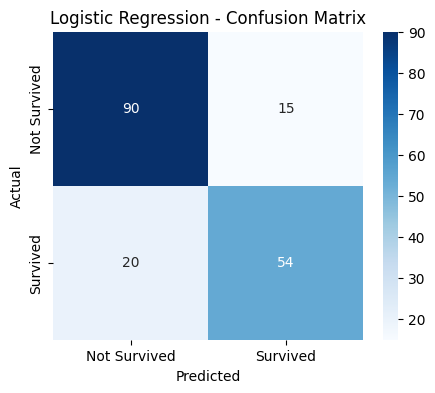

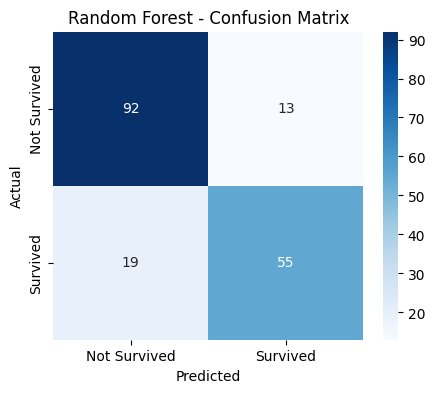

In [20]:
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


C:\Users\tause\AppData\Local\Temp\ipykernel_21384\2957173335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_factors.columns, y=survival_factors.loc[1], palette="viridis")


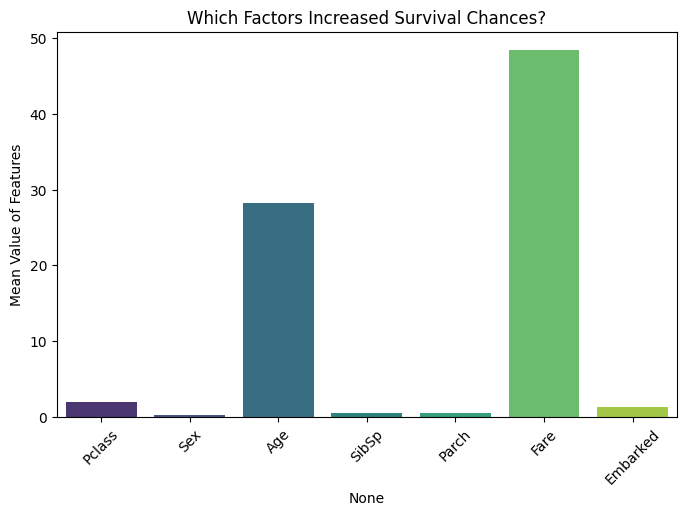

In [21]:
# Insights on survival likelihood
survival_factors = df.groupby("Survived").mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_factors.columns, y=survival_factors.loc[1], palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Mean Value of Features")
plt.title("Which Factors Increased Survival Chances?")
plt.show()


In [22]:
# Conclusion
print("Summary: The analysis revealed that gender, socio-economic class, and age were key factors influencing survival on the Titanic. Women, children, and first-class passengers had higher survival rates. The Random Forest model performed better than Logistic Regression, highlighting the importance of these factors.")


Summary: The analysis revealed that gender, socio-economic class, and age were key factors influencing survival on the Titanic. Women, children, and first-class passengers had higher survival rates. The Random Forest model performed better than Logistic Regression, highlighting the importance of these factors.
